Давыдов ПИм-231 лаба 16

1. Загрузите данные в DataFrame с помощью функции read_csv библиотеки
pandas.
2. Разделите данные на обучающую и тестовую выборки с помощью функции
train_test_split.
3. Постройте дерево решений с помощью класса
DecisionTreeClassifier с гиперпараметрами по умолчанию.
4. Отобразите дерево решений с глубиной 2. Опишите процесс принятия
решения.
5. Получите информативность признаков. Какие признаки наиболее
значимые, какие - наименее?
6. Оцените качество модели с помощью функции
classification_report.
7. Какая из моделей лучше подходит для диагностики диабета? Линейная
SVM-модель (из задания 14) или дерево решений?
8. Подберите оптимальное значение гиперпараметра max_depth с помощью
поиска по сетке (класс GridSearchCV).
9. Обучите модель с оптимальным max_depth и оцените результат.
10. Какая из моделей лучше всего решает поставленную задачу? Как Вы
думаете, если уравнять количество наблюдений по классам для обучения
модели, качество улучшится или нет?

1. Загрузите данные в DataFrame с помощью функции read_csv библиотеки
pandas.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


2. Разделите данные на обучающую и тестовую выборки с помощью функции
train_test_split.

In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

3. Постройте дерево решений с помощью класса
DecisionTreeClassifier с гиперпараметрами по умолчанию.
4. Отобразите дерево решений с глубиной 2. Опишите процесс принятия
решения.

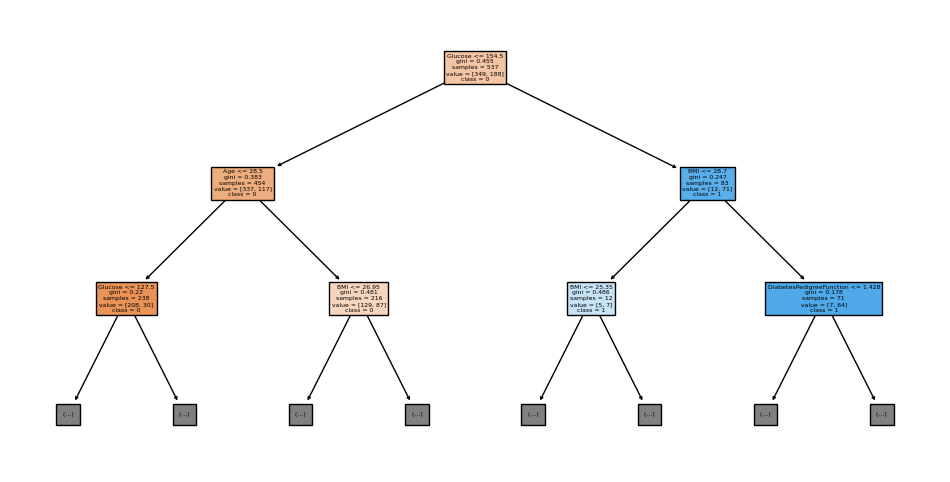

In [ ]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# с глубиной 2
plt.figure(figsize=(12, 6))
plot_tree(tree_model, max_depth=2, feature_names=X.columns, class_names=["0", "1"], filled=True)
plt.show()

Сначала спрашиваем глюкозу, если она <= 154.5, то спрашиваем возраст, если она больше, то спрашиваем BMI. Какое-то странное дерево, потому что далее модель решила спрашивать то же самое.

5. Получите информативность признаков. Какие признаки наиболее
значимые, какие - наименее?

In [ ]:
# важности признаков
importance = tree_model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_importance_df


,Feature,Importance
1,Glucose,0.356937
5,BMI,0.186479
7,Age,0.134134
2,BloodPressure,0.097345
6,DiabetesPedigreeFunction,0.096871
3,SkinThickness,0.061428
4,Insulin,0.039552
0,Pregnancies,0.027255


6. Оцените качество модели с помощью функции
classification_report.

In [ ]:
y_pred = tree_model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.71      0.76       151
           1       0.56      0.69      0.61        80

    accuracy                           0.70       231
   macro avg       0.68      0.70      0.69       231
weighted avg       0.72      0.70      0.71       231



Плохие результаты

7. Какая из моделей лучше подходит для диагностики диабета? Линейная
SVM-модель (из задания 14) или дерево решений?

In [ ]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       151
           1       0.66      0.49      0.56        80

    accuracy                           0.74       231
   macro avg       0.71      0.68      0.69       231
weighted avg       0.73      0.74      0.72       231



Чуть лучше.

8. Подберите оптимальное значение гиперпараметра max_depth с помощью
поиска по сетке (класс GridSearchCV).
9. Обучите модель с оптимальным max_depth и оцените результат.

In [ ]:
tree_model = DecisionTreeClassifier()
param_grid = {'max_depth': range(1, 11)}  # попробуем глубины от 1 до 10
grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Наилучшее значение max_depth:", grid_search.best_params_)

# Предсказание на тестовых данных с использованием модели с наилучшим параметром
best_tree = grid_search.best_estimator_
y_pred_tree = best_tree.predict(X_test)

print(classification_report(y_test, y_pred_tree))


Наилучшее значение max_depth: {'max_depth': 4}
              precision    recall  f1-score   support

           0       0.85      0.68      0.75       151
           1       0.56      0.78      0.65        80

    accuracy                           0.71       231
   macro avg       0.70      0.73      0.70       231
weighted avg       0.75      0.71      0.72       231



Почти нет изменений.

10. Какая из моделей лучше всего решает поставленную задачу? Как Вы
думаете, если уравнять количество наблюдений по классам для обучения
модели, качество улучшится или нет?

Лучше всего справился метод опорных векторов.

In [ ]:
y_test.value_counts()

0    151
1     80
Name: Outcome, dtype: int64

In [ ]:
y_train.value_counts()

0    349
1    188
Name: Outcome, dtype: int64

In [ ]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Как видно, наблюдений 1 меньше почти в два раза, что влияет на качество модели.
Я нашел, что можно задать веса для признаков в методе решающих деревьев. Сейчас посмотрим, поможет ли это.

In [ ]:
# Создание модели с взвешенными классами
model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
# class_weight='balanced' - взвешивание
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.73      0.76       151
           1       0.56      0.66      0.61        80

    accuracy                           0.71       231
   macro avg       0.68      0.70      0.69       231
weighted avg       0.72      0.71      0.71       231



К сожалению, не помогло.